In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV

# Importar árboles de decision , ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso coding dojo/dataset/supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
del(df['Invoice ID'])
del(df['Date'])
del(df['Time'])

In [ ]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit(df['Branch'])
encoded = lab_enc.fit(df['Customer type'])
encoded = lab_enc.fit(df['Gender'])
encoded = lab_enc.fit(df['Payment'])
encoded = lab_enc.fit(df['City'])
encoded = lab_enc.fit(df['Product line'])

df['Product line']=encoded.fit_transform(df.Branch.values)
df['City']=encoded.fit_transform(df.Branch.values)
df['Branch']=encoded.fit_transform(df.Branch.values)
df['Customer type']=encoded.fit_transform(df.Branch.values)
df['Gender']=encoded.fit_transform(df.Branch.values)
df['Payment']=encoded.fit_transform(df.Branch.values)
#list(encoded.classes_)
#transf=encoded.transform(df['Branch'])
print(df)

     Branch  City  Customer type  ...  gross margin percentage  gross income  Rating
0         0     0              0  ...                 4.761905       26.1415     9.1
1         2     2              2  ...                 4.761905        3.8200     9.6
2         0     0              0  ...                 4.761905       16.2155     7.4
3         0     0              0  ...                 4.761905       23.2880     8.4
4         0     0              0  ...                 4.761905       30.2085     5.3
..      ...   ...            ...  ...                      ...           ...     ...
995       2     2              2  ...                 4.761905        2.0175     6.2
996       1     1              1  ...                 4.761905       48.6900     4.4
997       0     0              0  ...                 4.761905        1.5920     7.7
998       0     0              0  ...                 4.761905        3.2910     4.1
999       0     0              0  ...                 4.761905   

In [ ]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


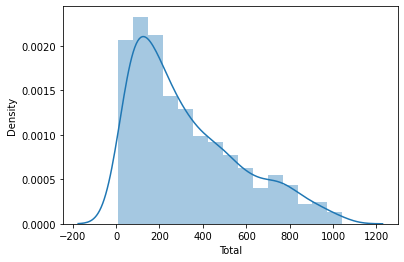

In [ ]:
sns.distplot(df['Total'])

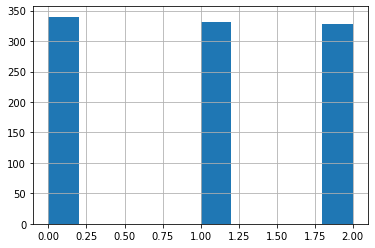

In [ ]:
df['Customer type'].hist()

In [ ]:
#del(df['Invoice ID'])
#del(df['City'])
#del(df['Product line'])
#del(df['Date'])
#del(df['Time'])

In [ ]:
X = df.drop(columns = 'Rating')
# Codificar nuestro objetivo
y = df['Rating']

In [ ]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
reg_pipe=make_pipeline(StandardScaler(),KNeighborsRegressor(n_neighbors=2))

In [ ]:
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=2))])

In [ ]:
reg_pipe.score(X_train,y_train)

0.4989646702942401

In [ ]:
reg_pipe.score(X_test,y_test)

-0.4643259960817925

In [ ]:
X = df.drop(columns = 'Rating')
# Codificar nuestro objetivo
y = df['Rating']

In [ ]:
# Instantiar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(scaled_df)

PCA()

Text(0, 0.5, 'Proportion of Explained Variance')

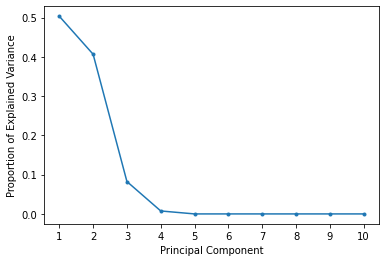

In [ ]:
# Graficar los ratios de varianza explicadas de los primeros 10 componentes principales
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [ ]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,0,0,0,0,74.69,7,26.1415,548.9715,0,522.83,4.761905,26.1415,9.1
1,2,2,2,2,2,15.28,5,3.8200,80.2200,2,76.40,4.761905,3.8200,9.6
2,0,0,0,0,0,46.33,7,16.2155,340.5255,0,324.31,4.761905,16.2155,7.4
3,0,0,0,0,0,58.22,8,23.2880,489.0480,0,465.76,4.761905,23.2880,8.4
4,0,0,0,0,0,86.31,7,30.2085,634.3785,0,604.17,4.761905,30.2085,5.3


In [ ]:
df.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
X = df.loc[:, ['Branch','City','Customer type','Gender','Product line','Unit price','Quantity','Tax 5%','Total','Payment','cogs','gross margin percentage','gross income']].values

In [ ]:
y = df.loc[:, 'Rating'].values

In [ ]:
reg = LinearRegression(fit_intercept=True)

In [ ]:
reg.fit(X,y)

LinearRegression()

In [ ]:
preds=reg.predict(X)

In [ ]:
reg.score(X,y)

0.004093292609817056

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,preds)

0.004093292609817056

In [ ]:
np.sum(np.abs(y-preds))/len(preds)

1.474697538167784

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,preds)

1.474697538167784

In [ ]:
np.sum((y-preds)**2)/len(preds)

2.9384871852777703

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,preds)

2.9384871852777703

In [ ]:
np.sqrt(np.sum((y-preds)**2)/len(preds))

1.7142016174527925

In [ ]:
np.sqrt(mean_squared_error(y,preds))

1.7142016174527925